Reference:
<br> Loy, James. "Neural Network Projects With Python". Packt. Feb 2019.

## Autoencoders

Input -> Encoder -> Latent Representation -> Decoder -> Output
* The goal of autoencoder is to learn a **Latent Representation** of the input.
* Autoencoders have an **Encoder** and a **Decoder**. 
Encoder: reconstruct the original input using the compressed representation.






**Encoder**: Encoding the input to a learned, compressed representatio.
<br> **Decoder**: Reconstruct the original input using the compressed representation.

**Pros:**


*   Reduce the dimensionalityof the input. The latent representaion is a natural reduced salient features representation of the input data.
*   Remove any noise from the input data(denoising). 



In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
from matplotlib import pyplot as plt

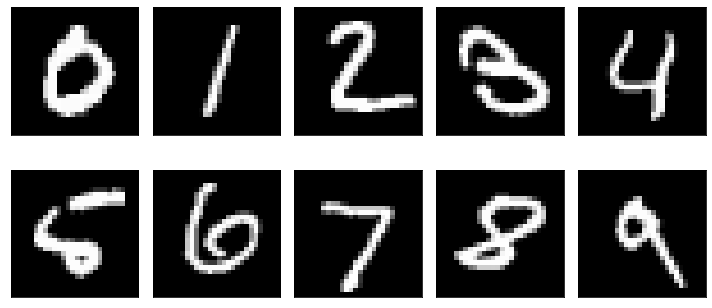

In [0]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
  for i in range(1000):
    if y_test[i] == idx:
      ax.imshow(X_test[i], cmap='gray')
      ax.grid(False)
      ax.set_xticks([])
      ax.set_yticks([])
      break
plt.tight_layout()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

Input images are 28x28 = 784 pixles.

In [0]:
hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))

In [0]:
model.add(Dense(units=784, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


Create a basic autoencoder function

In [0]:
def create_basic_autoencoder(hidden_layer_size):
  model=Sequential()
  model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
  model.add(Dense(units=784, activation='sigmoid'))
  return model

In [0]:
# model = create_basic_autoencoder(hidden_layer_size=1)

## Basic Autoencoder

X_train.shape[0]: number of samples: 60000
<br> X_train.shape[1]: 28
<br> X_train.shape[2]: 28

In [0]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [0]:
X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0749
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0653
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0641
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0636
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0632
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0629
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0625
Epoch 8/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0620
Epoch 9/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0617
Epoch 10/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0614


In [0]:
output = model.predict(X_test_reshaped)

Plot the output

In [0]:
import random

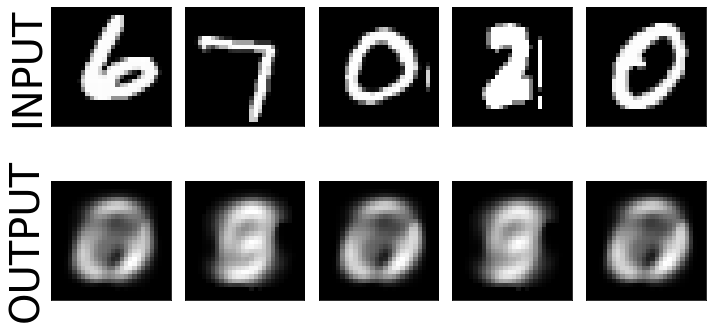

In [0]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))

# randomly select 5 images
randomly_selected_img = random.sample(range(output.shape[0]), 5)

# plot original images (input) on top row
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(X_test[randomly_selected_img[i]], cmap='gray')
  if i == 0:
    ax.set_ylabel("INPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(output[randomly_selected_img[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("OUTPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

Obviously, the autoencoder with a hidden layer size of one node is insufficient to encode. This latent representation is too small for our autoencoder to sufficiently capture the salient features of our data.

## Autoencoders with different number of nodes

In [0]:
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size=32)

In [0]:
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

In [0]:
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)

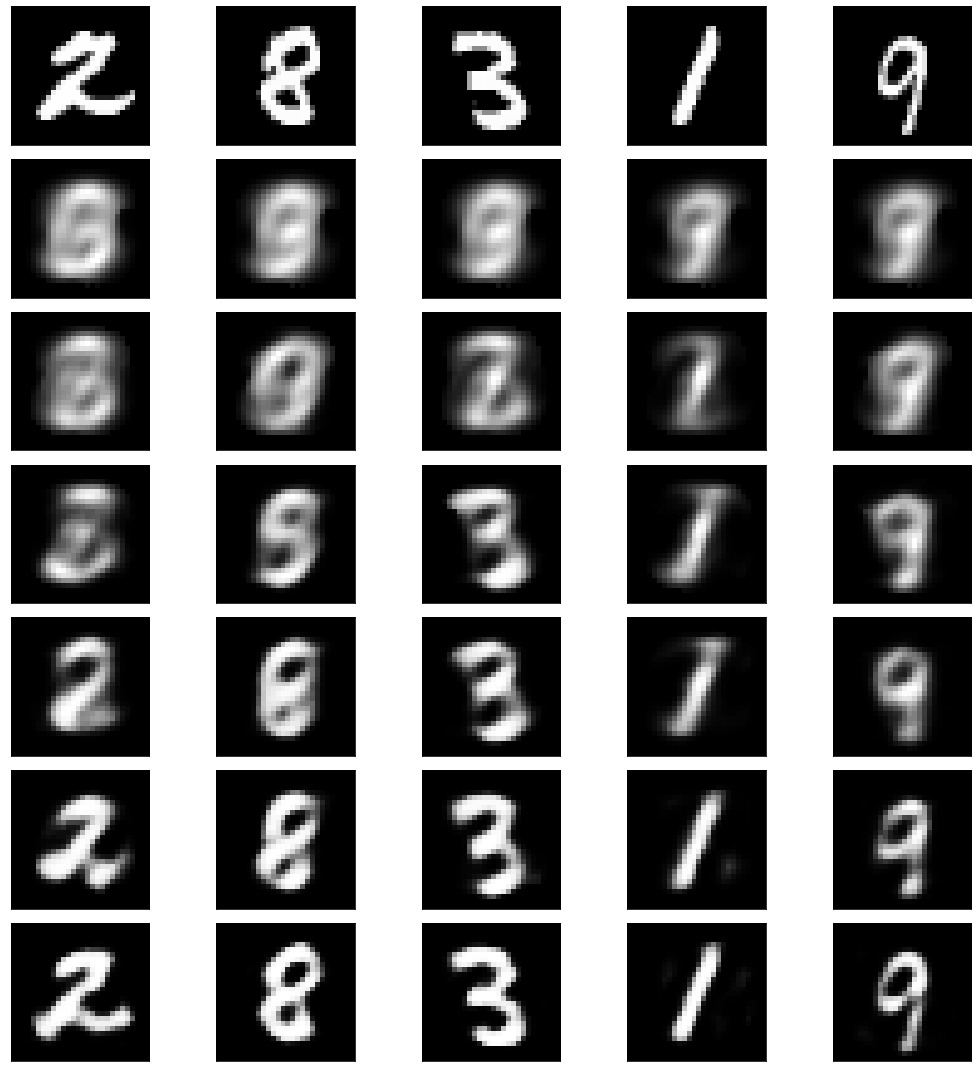

In [0]:
fig, axes = plt.subplots(7, 5, figsize=(15, 15))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)
outputs = [X_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

# Iterate through each subplot and plot accordingly
for row_num, row in enumerate(axes):
  for col_num, ax in enumerate(row):
    ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28, 28), cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

32 nodes is pretty good

## Denoising autoencoders

During the training process, the autpencoder will learn that the noises in the image should not be a part of the output. Essentially, we are training our autoencoder to remove noise from images.

In [0]:
import numpy as np

In [0]:
# Add a random value between -0.5 and 0.5 to each pixel in the original images
X_train_noisy = X_train_reshaped + np.random.normal(0, 0.5, size=X_train_reshaped.shape)
X_test_noisy = X_test_reshaped + np.random.normal(0, 0.5, size=X_test_reshaped.shape)

In [0]:
# clip values between 0 and 1. That is, if x < a_min, then x = a_min, vise versa.
X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

### Basic Denoise Autoencoder

In [0]:
basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)
basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0514
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0340
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0332
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0323
Epoch 5/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0318
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0315
Epoch 7/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0305
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0303
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0302
Epoch 10/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0301


In [0]:
output = basic_denoise_autoencoder.predict(X_test_noisy)

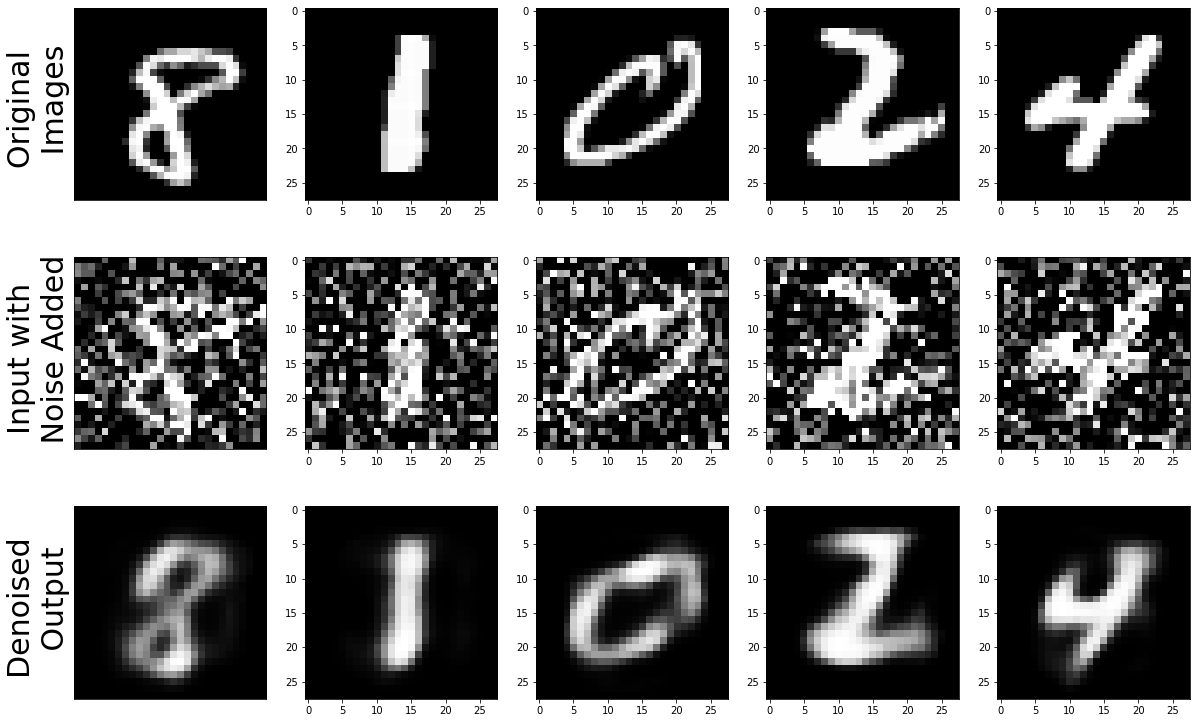

In [0]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Input with \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

### Deep Convolutional Denoising Autoencoder

Input -> Conv (16 filters) -> Conv (8) -> Latent Representation -> Conv (8) -> Conv (16) -> Output

**Parameters:**
*   **Number of filters**: Use a decreasing number of filters in the encoder, and use an increasing number of filters in the decoder. 
*   **Filter size**: typical size for Conv layers are usually 3x3.
*   **Padding**: Autoencoders use the same padding, this ensures the width and height of successive layers remains the same, which ensures the dimension of the final output is the same as the input.



In [0]:
conv_autoencoder=Sequential()

In [0]:
from keras.layers import Conv2D

In [0]:
# Conv layers in encoder
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

In [0]:
# Conv layers in decoder
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

In [0]:
# Output layer
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [0]:
conv_autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000,28,28,1), X_train_reshaped.reshape(60000,28,28,1), epochs=10)

Epoch 1/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1195
Epoch 2/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1022
Epoch 3/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1008
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0998
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0991
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0987
Epoch 7/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0983
Epoch 8/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0980
Epoch 9/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0978
Epoch 10/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0976


In [0]:
output=conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))

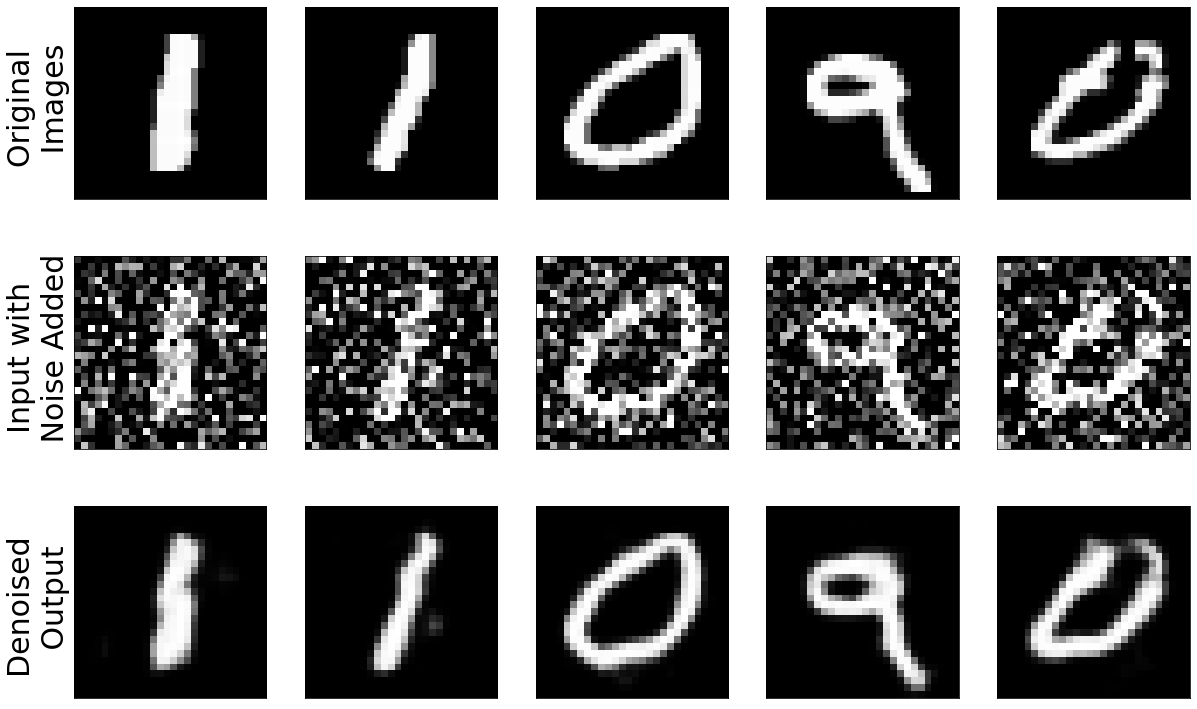

In [0]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Input with \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()